# 手动实现线性回归

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import torch
from IPython import display
import random

In [34]:
num_input = 2
num_example = 1000
true_w = [2, -3.4]
true_b = 4.2
# torch.from_numpy(np.random.normal(0, 1, (num_example, num_input))) 意思是生成一个  (num_example, num_input) 指定生成数组的形状，即生成一个大小为 (num_example, num_input) 的矩阵，矩阵中的每个元素都是独立抽样得到的符合 N (0, 1) 分布的值
features = torch.from_numpy(np.random.normal(0, 1, (num_example, num_input)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# 添加噪声
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))
# features

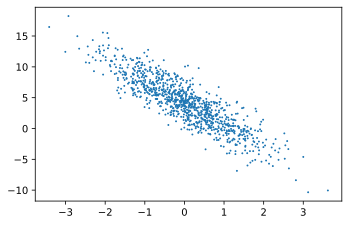

In [35]:
# 可视化数据
def use_svg_display():
    # 用矢量图显示
    set_matplotlib_formats('svg')

def set_figsize(figuresize=(5.5, 3.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figuresize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [36]:
# 它每次返回 batch_size (批量大小) 个随机样本的特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [37]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.2941, -0.3268],
        [-1.1284,  1.6534],
        [-0.0791,  0.1252],
        [ 0.1213, -0.0731],
        [ 0.3758, -2.1379],
        [ 0.4519,  0.8348],
        [-0.5408,  0.5372],
        [ 0.1358,  0.1327],
        [-0.2611,  0.0542],
        [-0.4653, -0.4057]], dtype=torch.float64) tensor([ 4.7274, -3.6660,  3.6170,  4.6785, 12.2199,  2.2599,  1.2901,  4.0100,
         3.4786,  4.6368], dtype=torch.float64)


# 初始化模型参数

In [44]:
w = torch.tensor(np.random.normal(0, 0.01, (num_input, 1)), dtype=torch.double)
b = torch.zeros(1, dtype=torch.double)

In [45]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], dtype=torch.float64, requires_grad=True)

# 定义模型

In [46]:
def linreg(X, w, b):
    return torch.mm(X, w) + b # mm 作为矩阵乘法

# 定义损失函数

In [47]:
def squared_loss(y_hat, y):
    return ((y_hat - y.view(y_hat.size())) ** 2) / 2

# 定义优化算法

In [48]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad.data / batch_size

# 训练模型

In [51]:
lr = 0.03 # learning_rate
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum() # l 是有关小批量X和y的损失
        l.backward() # 对小批量模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型
        
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('Epoch: %d, loss %f' % (epoch + 1, train_l.mean().item()))

Epoch: 1, loss 0.000053
Epoch: 2, loss 0.000053
Epoch: 3, loss 0.000053


In [52]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3999]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1997], dtype=torch.float64, requires_grad=True)
